In [1]:
%load_ext autoreload
%autoreload 2

Procedure

- Create mesh
    - Generates object with nodes and elements as properties
    - Depends on coordinate system, mesh size, and symmetry conditions

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

- Create mesh 
    - Depends on element size and extents
    - Returns coordinate axes (size of each is nx, ny, nz)
- Add structures to mesh
    - Get nodes in struct based on coordinates
    - Change part id of elements in struct
        - All nodes in element should be within struct? 
    -- Generate list of node ids in struct
- Add boundary constraints 
    - Depends on mesh symmetry
    - Change tc and rc of nodes on faces and edges
- Add pml
    - Depends on mesh symmetry and pml thickness
    - Change part id of non-symmetry plane elements
    - Part id + 1 if also in struct
- Finish dyna deck
    - Add material
    - Add load curves
    - Add arf load based on field params (pre-generated)
    - Add database/control parameters
        - Node sets?
- Validation functions
    - Make sure nodes exist on center axis regardless of mesh symmetry so peak arf load is modeled



In [5]:
import fem
import pathlib

from fem.dyna.mesh import Coordinates, DynaMesh
from fem.dyna._structure import Structure
from fem.dyna.material import KelvinMaxwellViscoelastic, Elastic

project_path = pathlib.Path(fem.__file__).parents[1]
sims_path = project_path.joinpath('sims')
sims_path.mkdir(parents=True, exist_ok=True)

mat1 = Elastic(density=1, E=15e3, nu=0.499)
# mat1 = KelvinMaxwellViscoelastic(density=1, E=26.11, nu=0.499, eta=2.34)
# mat2 = KelvinMaxwellViscoelastic(density=1, E=2*26.11, nu=0.499, eta=2.34)

# struct_list = [
    # Structure(
    #     shape = 'rectangle', 
    #     args = [-1, -0.5, 0, 0.5, -4, -2],
    #     material = mat2,  
    # ), 
    # Structure(
    #     shape = 'sphere', 
    #     args = [0, 0, -2, 1],
    #     material = mat2,  
    # ), 
# ]

coords = Coordinates(
    nx=51, ny=51, nz=101,
    # nx=25, ny=25, nz=51,
    xmin=-1.0, xmax=0.0,  # ele
    ymin=0.0, ymax=0.5,  # lat
    zmin=-4.0, zmax=-0.15   # ax
    # nx=11, ny=11, nz=51,
    # nx=5, ny=5, nz=11,
    # xmin=-1.5, xmax=0.0,  # ele
    # ymin=0.0, ymax=1.5,  # lat
    # zmin=-4.0, zmax=-0.5   # ax
)
symmetry = 'q'
mesh = DynaMesh(coords, symmetry, mat1)

# mesh.add_pml(pml_thickness=2, exclude_faces=['zmin'])
mesh.add_pml(pml_thickness=7)
# mesh.add_struct_list(struct_list)
mesh.constrain_boundary_nodes()

mesh.set_control(end_time=4.5e-3)
mesh.set_database(dt=2e-5)
mesh.set_master(title='testing')

load_curve_id = 1
normalization_isppa = 1000
field_load_file = project_path.joinpath('loads/test_loads.mat')
# field_load_file = project_path.joinpath('loads/test_load_full_extent.mat')
mesh.add_load_curve(load_curve_id, 'arf', [70e-6, 5e-6])
mesh.add_field_arf_load(field_load_file, normalization_isppa, load_curve_id)

load_folder_name = 'load_0'
material_folder_name = 'material_0'
mesh.write_all_dyna_cards(sims_path, load_folder_name, material_folder_name)


symmetry plane: ymin
symmetry plane: xmax
pml plane: xmin
pml plane: zmin
pml plane: zmax
pml plane: ymax


In [8]:
nodes = mesh.get_nodes_3d()

nodes[:,:,0]

rec.array([[( 1, -1.  , 0.   , -4., 7, 7), ( 6, -1.  , 0.125, -4., 7, 7),
            (11, -1.  , 0.25 , -4., 7, 7), (16, -1.  , 0.375, -4., 7, 7),
            (21, -1.  , 0.5  , -4., 7, 7)],
           [( 2, -0.75, 0.   , -4., 7, 7), ( 7, -0.75, 0.125, -4., 7, 7),
            (12, -0.75, 0.25 , -4., 7, 7), (17, -0.75, 0.375, -4., 7, 7),
            (22, -0.75, 0.5  , -4., 7, 7)],
           [( 3, -0.5 , 0.   , -4., 7, 7), ( 8, -0.5 , 0.125, -4., 7, 7),
            (13, -0.5 , 0.25 , -4., 7, 7), (18, -0.5 , 0.375, -4., 7, 7),
            (23, -0.5 , 0.5  , -4., 7, 7)],
           [( 4, -0.25, 0.   , -4., 7, 7), ( 9, -0.25, 0.125, -4., 7, 7),
            (14, -0.25, 0.25 , -4., 7, 7), (19, -0.25, 0.375, -4., 7, 7),
            (24, -0.25, 0.5  , -4., 7, 7)],
           [( 5,  0.  , 0.   , -4., 7, 7), (10,  0.  , 0.125, -4., 7, 7),
            (15,  0.  , 0.25 , -4., 7, 7), (20,  0.  , 0.375, -4., 7, 7),
            (25,  0.  , 0.5  , -4., 7, 7)]],
          dtype=[('id', '<i4'), ('x', '

In [10]:
from fem.post.create_disp_dat import create_dat

create_dat(nodout=sim_folder / 'nodout')

INFO:fem.post.create_disp_dat:Reading number of time steps... 
INFO:fem.post.create_disp_dat:there are 50.
INFO:fem.post.create_disp_dat:Time Step: 
INFO:fem.post.create_disp_dat:1, 
INFO:fem.post.create_disp_dat:2, 
INFO:fem.post.create_disp_dat:3, 
INFO:fem.post.create_disp_dat:4, 
INFO:fem.post.create_disp_dat:5, 
INFO:fem.post.create_disp_dat:6, 
INFO:fem.post.create_disp_dat:7, 
INFO:fem.post.create_disp_dat:8, 
INFO:fem.post.create_disp_dat:9, 
INFO:fem.post.create_disp_dat:10, 
INFO:fem.post.create_disp_dat:11, 
INFO:fem.post.create_disp_dat:12, 
INFO:fem.post.create_disp_dat:13, 
INFO:fem.post.create_disp_dat:14, 
INFO:fem.post.create_disp_dat:15, 
INFO:fem.post.create_disp_dat:16, 
INFO:fem.post.create_disp_dat:17, 
INFO:fem.post.create_disp_dat:18, 
INFO:fem.post.create_disp_dat:19, 
INFO:fem.post.create_disp_dat:20, 
INFO:fem.post.create_disp_dat:21, 
INFO:fem.post.create_disp_dat:22, 
INFO:fem.post.create_disp_dat:23, 
INFO:fem.post.create_disp_dat:24, 
INFO:fem.post.create

0

In [12]:
from fem.post.create_res_sim import read_header

dispout = 'disp.dat'
header = read_header(dispout)

print(header)

{'num_nodes': 275, 'num_dims': 4, 'num_timesteps': 50}


In [8]:
from fem.mesh import fem_mesh

node_id_coords = fem_mesh.load_nodeIDs_coords(nodes)
[snic, axes] = fem_mesh.SortNodeIDs(node_id_coords)

print(snic.shape)

(51, 51, 101)


In [15]:
from fem.post.create_res_sim import run as create_res_sim
import pathlib
import fem

load_folder_name = 'load_0'
material_folder_name = 'material_0'

project_path = pathlib.Path(fem.__file__).parents[1]
sims_path = project_path.joinpath('sims')
sim_folder = sims_path / load_folder_name / material_folder_name

dynadeck = sim_folder / 'Master.dyn'
nodes = sims_path / 'nodes.dyn'

create_res_sim(dynadeck, nodedyn=nodes)


INFO:fem.post.create_res_sim:Total Timesteps: 50
INFO:fem.post.create_res_sim:Extracting timestep:
INFO:fem.post.create_res_sim:1


50 0.0 0
[[    51   2652   5253 ... 254949 257550 260151]
 [   102   2703   5304 ... 255000 257601 260202]
 [   153   2754   5355 ... 255051 257652 260253]
 ...
 [  2499   5100   7701 ... 257397 259998 262599]
 [  2550   5151   7752 ... 257448 260049 262650]
 [  2601   5202   7803 ... 257499 260100 262701]]


INFO:fem.post.create_res_sim:2
INFO:fem.post.create_res_sim:3
INFO:fem.post.create_res_sim:4
INFO:fem.post.create_res_sim:5
INFO:fem.post.create_res_sim:6
INFO:fem.post.create_res_sim:7
INFO:fem.post.create_res_sim:8
INFO:fem.post.create_res_sim:9
INFO:fem.post.create_res_sim:10
INFO:fem.post.create_res_sim:11
INFO:fem.post.create_res_sim:12
INFO:fem.post.create_res_sim:13
INFO:fem.post.create_res_sim:14
INFO:fem.post.create_res_sim:15
INFO:fem.post.create_res_sim:16
INFO:fem.post.create_res_sim:17
INFO:fem.post.create_res_sim:18
INFO:fem.post.create_res_sim:19
INFO:fem.post.create_res_sim:20
INFO:fem.post.create_res_sim:21
INFO:fem.post.create_res_sim:22
INFO:fem.post.create_res_sim:23
INFO:fem.post.create_res_sim:24
INFO:fem.post.create_res_sim:25
INFO:fem.post.create_res_sim:26
INFO:fem.post.create_res_sim:27
INFO:fem.post.create_res_sim:28
INFO:fem.post.create_res_sim:29
INFO:fem.post.create_res_sim:30
INFO:fem.post.create_res_sim:31
INFO:fem.post.create_res_sim:32
INFO:fem.post.cr

0

In [7]:
from scipy.io import loadmat

load_folder_name = 'load_0'
material_folder_name = 'material_0'

project_path = pathlib.Path(fem.__file__).parents[1]
sims_path = project_path.joinpath('sims')
sim_folder = sims_path / load_folder_name / material_folder_name

mat = loadmat(sim_folder / 'res_sim.mat')

mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 't', 'ele', 'lat', 'axial', 'arfidata'])

In [18]:
mat['arfidata'].shape

(51, 25, 25, 196)

In [9]:
mat['axial']

array([[ 1.5 ],
       [ 1.89],
       [ 2.27],
       [ 2.66],
       [ 3.04],
       [ 3.43],
       [ 3.81],
       [ 4.2 ],
       [ 4.58],
       [ 4.97],
       [ 5.35],
       [ 5.74],
       [ 6.12],
       [ 6.51],
       [ 6.89],
       [ 7.28],
       [ 7.66],
       [ 8.05],
       [ 8.43],
       [ 8.82],
       [ 9.2 ],
       [ 9.59],
       [ 9.97],
       [10.36],
       [10.74],
       [11.13],
       [11.51],
       [11.9 ],
       [12.28],
       [12.67],
       [13.05],
       [13.44],
       [13.82],
       [14.21],
       [14.59],
       [14.98],
       [15.36],
       [15.75],
       [16.13],
       [16.52],
       [16.9 ],
       [17.29],
       [17.67],
       [18.06],
       [18.44],
       [18.83],
       [19.21],
       [19.6 ],
       [19.98],
       [20.37],
       [20.75],
       [21.14],
       [21.52],
       [21.91],
       [22.29],
       [22.68],
       [23.06],
       [23.45],
       [23.83],
       [24.22],
       [24.6 ],
       [24.99],
       [

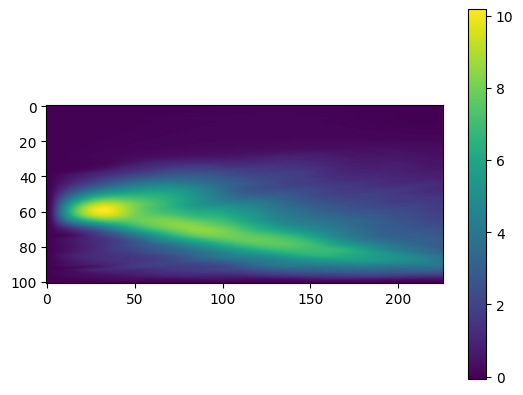

In [8]:
plt.imshow(mat['arfidata'][:,0,-1,:])
plt.colorbar()

In [24]:
import pathlib
import fem
from scipy.io import loadmat

load_path = pathlib.Path(fem.__file__).parents[1].joinpath('loads')
# mat_file = load_path / 'test_loads.mat'
mat_file = load_path / 'test_load_full_extent.mat'

mat = loadmat(mat_file)
c = mat['FIELD_PARAMS']['soundSpeed'][0,0][0][0] 
alpha_db = mat['FIELD_PARAMS']['alpha'][0,0][0][0]
frequency = mat['FIELD_PARAMS']['Frequency'][0,0][0][0]
alpha_np = alpha_db * frequency / 8.616

print(mat.keys())
print(c, alpha_db, frequency, alpha_np)

dict_keys(['__header__', '__version__', '__globals__', 'FIELD_PARAMS', 'intensity'])
1540 0.7 4.21 0.34203806870937786


In [11]:
mat['FIELD_PARAMS'].dtype

dtype([('measurementPointsandNodes', 'O'), ('measurementPoints', 'O'), ('alpha', 'O'), ('Fnum', 'O'), ('focus', 'O'), ('Frequency', 'O'), ('Transducer', 'O'), ('Impulse', 'O'), ('soundSpeed', 'O'), ('samplingFrequency', 'O'), ('lat_extent', 'O'), ('ele_extent', 'O'), ('ax_extent', 'O')])

In [25]:
mpn = mat['FIELD_PARAMS']['measurementPoints'][0,0]

extent = dict(
    lat=np.unique(mpn[:,0]),
    ele=np.unique(mpn[:,1]),
    ax=np.unique(mpn[:,2]),
)

extent

{'lat': array([-0.02  , -0.0175, -0.015 , -0.0125, -0.01  , -0.0075, -0.005 ,
        -0.0025,  0.    ,  0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,
         0.015 ,  0.0175,  0.02  ]),
 'ele': array([-0.02  , -0.0175, -0.015 , -0.0125, -0.01  , -0.0075, -0.005 ,
        -0.0025,  0.    ,  0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,
         0.015 ,  0.0175,  0.02  ]),
 'ax': array([0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175, 0.02  , 0.0225,
        0.025 , 0.0275, 0.03  , 0.0325, 0.035 , 0.0375, 0.04  , 0.0425,
        0.045 ])}

In [20]:
'ax_extent' in mat['FIELD_PARAMS'].dtype.names

True

In [23]:
mat['FIELD_PARAMS']['ele_extent']

array([[array([[-0.01   ],
               [-0.00975],
               [-0.0095 ],
               [-0.00925],
               [-0.009  ],
               [-0.00875],
               [-0.0085 ],
               [-0.00825],
               [-0.008  ],
               [-0.00775],
               [-0.0075 ],
               [-0.00725],
               [-0.007  ],
               [-0.00675],
               [-0.0065 ],
               [-0.00625],
               [-0.006  ],
               [-0.00575],
               [-0.0055 ],
               [-0.00525],
               [-0.005  ],
               [-0.00475],
               [-0.0045 ],
               [-0.00425],
               [-0.004  ],
               [-0.00375],
               [-0.0035 ],
               [-0.00325],
               [-0.003  ],
               [-0.00275],
               [-0.0025 ],
               [-0.00225],
               [-0.002  ],
               [-0.00175],
               [-0.0015 ],
               [-0.00125],
               [-0.001  ],
 